In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 17, 'figure.figsize': [15, 7]})


In [34]:
results = pd.read_csv("brute_force_last_agent__evaluation_experiment.csv", index_col=0).sort_values("utility")
results.head()

,utility,price_cost,emission_cost,grid_cost,search_depths,d_action,plan_steps,default_action,utility_weighting,action_space_list,max_search_time,random_order
7,0.989873,0.836168,1.029949,1.103503,"(0, 1, 2, 3, 4, 5, 6)",0.2,1000,0.0,"(0.2, 0.1111111111111111, 0.5, 0.1428571428571...",NaN,0.2,0.0
6,0.990339,0.836001,1.033134,1.101881,"(0, 1, 2, 3, 4, 5, 6)",0.2,1000,0.0,"(0.1111111111111111, 0.1, 0.3333333333333333, ...",NaN,0.2,0.0
9,1.002883,0.836176,1.028237,1.144236,"(0, 1, 2, 3, 4, 5, 6)",0.2,1000,0.0,"(0.1, 0.125, 0.14285714285714285, 0.1)",NaN,0.2,0.0
8,1.009777,0.829922,1.033746,1.165663,"(0, 1, 2, 3, 4, 5, 6)",0.2,1000,0.0,"(0.125, 0.1, 0.1111111111111111, 0.125)",NaN,0.2,0.0
0,1.011010,0.842723,1.030870,1.159437,"(0, 1, 2, 3, 4, 5, 6)",0.2,1000,0.0,"(0.14285714285714285, 0.25, 0.25, 0.2)",NaN,0.2,0.0


In [35]:
def str_to_tuple(string):
    return tuple(map(float, string[1:-1].split(",")))

utility_weighting = results.utility_weighting.to_numpy()
price_weighting = [str_to_tuple(utility_weighting[i])[0] for i in range(len(utility_weighting))]
emission_weighting = [str_to_tuple(utility_weighting[i])[1] for i in range(len(utility_weighting))]
ramping_weighting = [str_to_tuple(utility_weighting[i])[2] for i in range(len(utility_weighting))]
load_weighting = [str_to_tuple(utility_weighting[i])[3] for i in range(len(utility_weighting))]

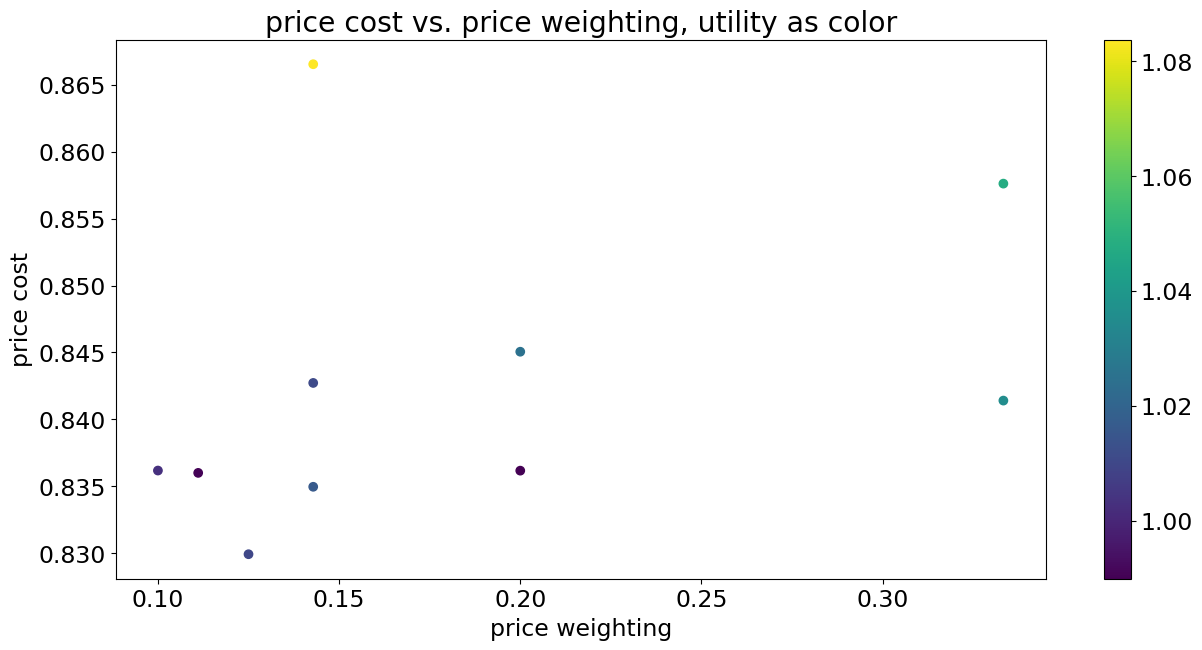

In [36]:
plt.figure()
plt.scatter(price_weighting, results["price_cost"], 36, results["utility"], cmap="viridis")
plt.xlabel("price weighting")
plt.ylabel("price cost")
plt.title("price cost vs. price weighting, utility as color")
plt.colorbar()
plt.show()

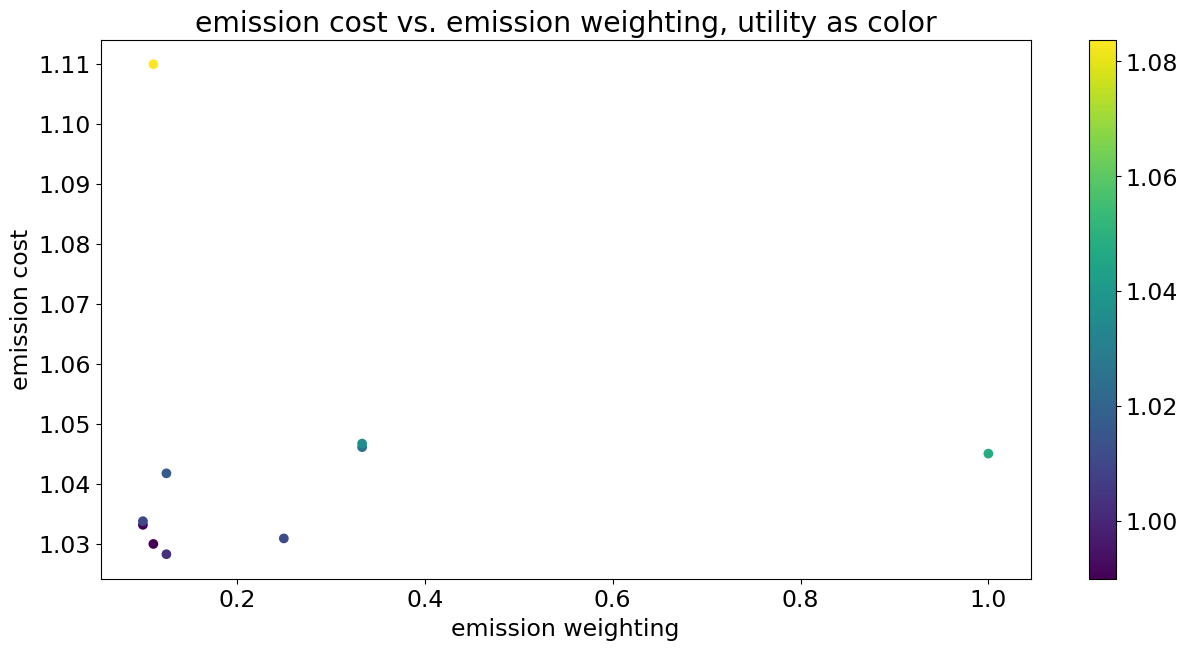

In [37]:
plt.figure()
plt.scatter(emission_weighting, results["emission_cost"], 36, results["utility"], cmap="viridis")
plt.xlabel("emission weighting")
plt.ylabel("emission cost")
plt.title("emission cost vs. emission weighting, utility as color")
plt.colorbar()
plt.show()

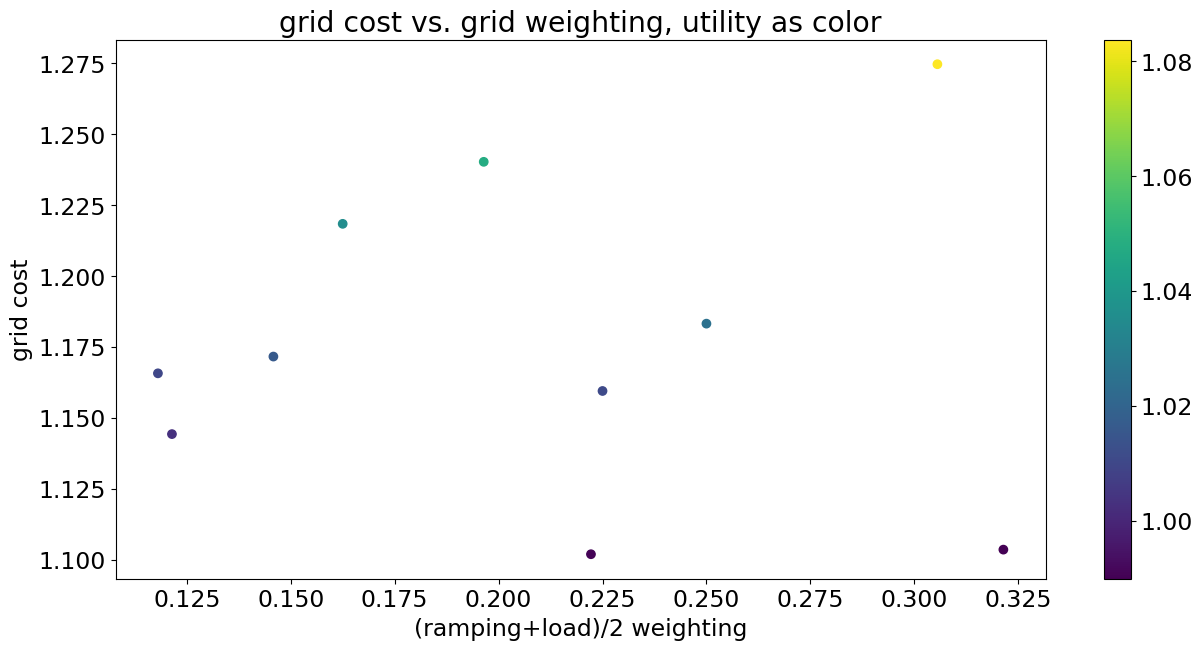

In [45]:
plt.figure()
grid_weighting = [(ramping_weighting[i] + load_weighting[i]) / 2 for i in range(len(ramping_weighting))]
plt.scatter(grid_weighting, results["grid_cost"], 36, results["utility"], cmap="viridis")
plt.xlabel("(ramping+load)/2 weighting")
plt.ylabel("grid cost")
plt.title("grid cost vs. grid weighting, utility as color")
plt.colorbar()
plt.show()

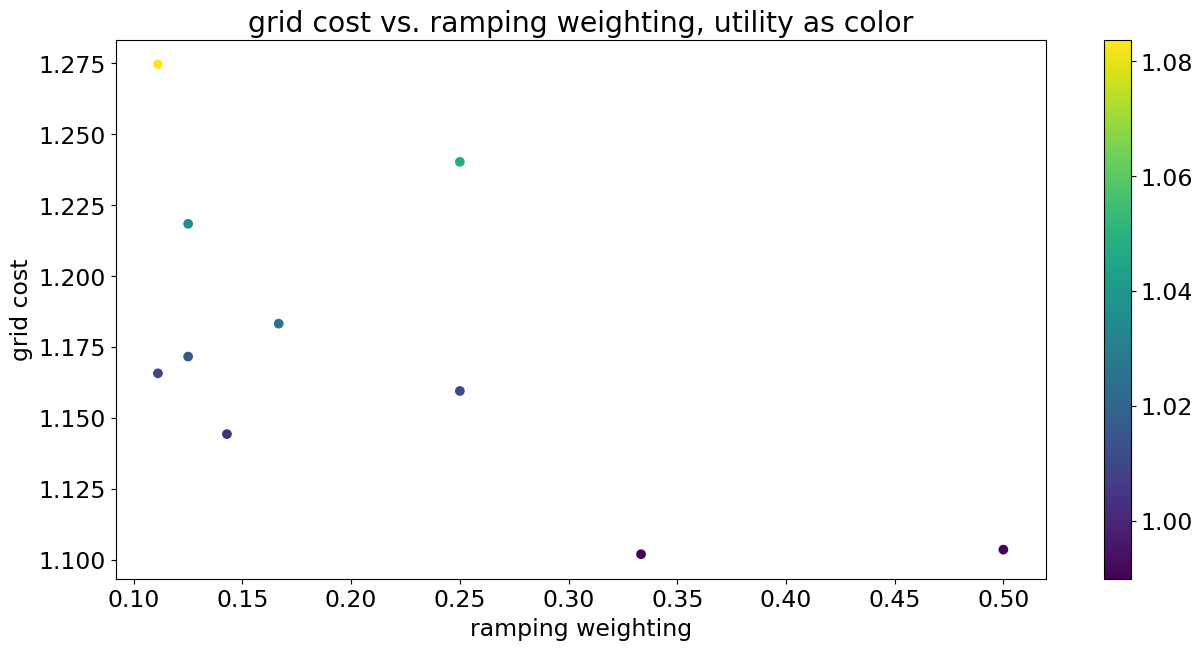

In [46]:
plt.figure()
plt.scatter(ramping_weighting, results["grid_cost"], 36, results["utility"], cmap="viridis")
plt.xlabel("ramping weighting")
plt.ylabel("grid cost")
plt.title("grid cost vs. ramping weighting, utility as color")
plt.colorbar()
plt.show()

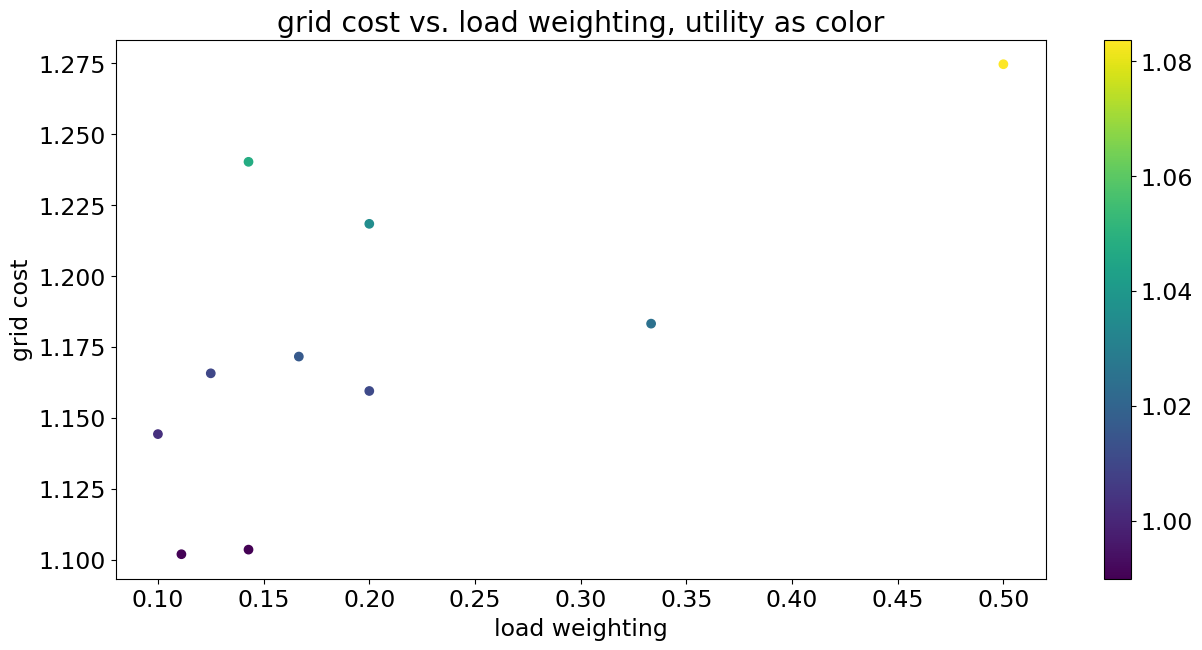

In [47]:
plt.figure()
plt.scatter(load_weighting, results["grid_cost"], 36, results["utility"], cmap="viridis")
plt.xlabel("load weighting")
plt.ylabel("grid cost")
plt.title("grid cost vs. load weighting, utility as color")
plt.colorbar()
plt.show()